In [14]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [15]:
(x_img_train,y_label_train), (x_img_test,y_label_test)=cifar10.load_data()

In [16]:
print('train:',len(x_img_train))
print('test:',len(x_img_test))
print(x_img_train.shape )
print(y_label_train.shape)

train: 50000
test: 10000
(50000, 32, 32, 3)
(50000, 1)


In [17]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

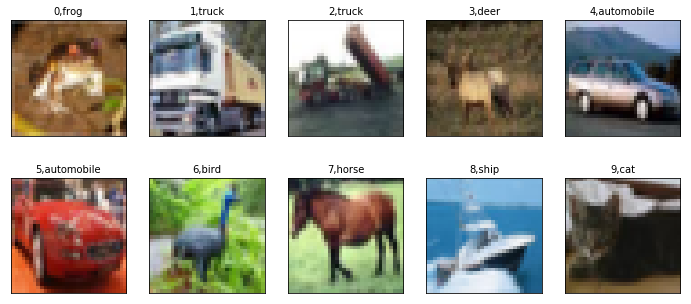

In [18]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: num = 25
    for i in range(0, num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [19]:
print(x_img_train[0][0][0])
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
print(x_img_train_normalize[0][0][0])

[59 62 63]
[0.23137255 0.24313726 0.24705882]


In [20]:
print(y_label_train.shape)
print(y_label_train[:5])

(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]


In [21]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
print(y_label_train_OneHot.shape)
print(y_label_train_OneHot[:5])

(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
model = Sequential()

#Convolution 1
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32,32,3),
                 activation='relu',
                 padding='same'))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

#convloution 2
model.add(Conv2D(filters=64, kernel_size=(3,3),
                 activation='relu',padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3),
                 activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

#convolution 3
model.add(Conv2D(filters=128, kernel_size=(3,3),
                 activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3,3),
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten Layer
model.add(Flatten())
model.add(Dropout(rate=0.3))

In [23]:
# Hidden layer
model.add(Dense(2500,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(rate=0.3))

In [24]:
#output layer
model.add(Dense(10,activation='softmax'))

In [25]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
__________

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])
try:
    model.load_weights("SaveModel/caifarCnnModel.h5")
    print("Loading model Success")
except:
    print("Loading model Failure")

train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split=0.2,
                          epochs=10, batch_size=128,verbose=1)

model.save_weights("SaveModel/caifarCnnModel.h5")
print("Save Model to Disk")

Loading model Success
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 12s 309us/step - loss: 0.3695 - acc: 0.8694 - val_loss: 0.6355 - val_acc: 0.7972
Epoch 2/10
40000/40000 [==============================] - 11s 281us/step - loss: 0.3445 - acc: 0.8782 - val_loss: 0.6493 - val_acc: 0.7924
Epoch 3/10
40000/40000 [==============================] - 11s 281us/step - loss: 0.3405 - acc: 0.8798 - val_loss: 0.6391 - val_acc: 0.7981
Epoch 4/10
40000/40000 [==============================] - 11s 281us/step - loss: 0.3219 - acc: 0.8868 - val_loss: 0.6448 - val_acc: 0.7995
Epoch 5/10
40000/40000 [==============================] - 11s 282us/step - loss: 0.3209 - acc: 0.8864 - val_loss: 0.6374 - val_acc: 0.7979
Epoch 6/10
40000/40000 [==============================] - 11s 282us/step - loss: 0.3045 - acc: 0.8934 - val_loss: 0.6370 - val_acc: 0.8013
Epoch 7/10
40000/40000 [==============================] - 11s 282us/step - loss: 0.2923 - acc:

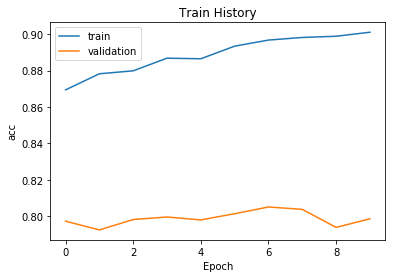

In [31]:
%matplotlib inline
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')

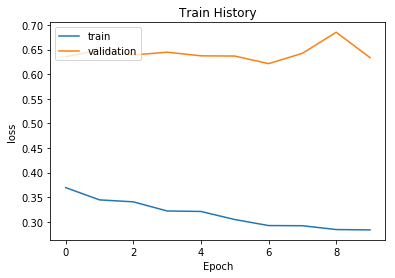

In [32]:
show_train_history(train_history,'loss','val_loss')

In [16]:
scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)
print(scores[0])

0.7229115983009339


In [17]:
prediction=model.predict_classes(x_img_test_normalize)
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 4, 3, 1])

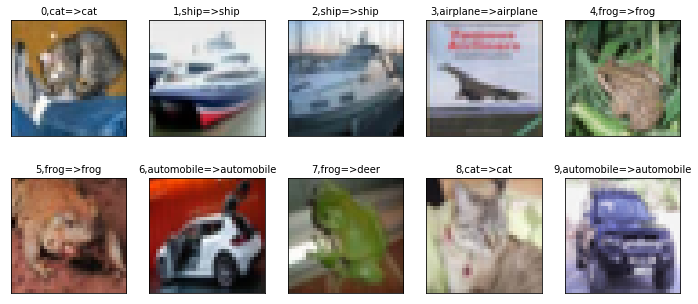

In [18]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

In [19]:
Predicted_Probability=model.predict(x_img_test_normalize)
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict cat


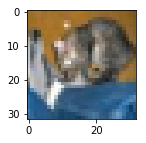

airplane Probability:0.000661629
automobile Probability:0.000143699
bird Probability:0.000897038
cat Probability:0.485289991
deer Probability:0.001770127
dog Probability:0.485156596
frog Probability:0.019910444
horse Probability:0.000897412
ship Probability:0.004813690
truck Probability:0.000459281


In [20]:
show_Predicted_Probability(y_label_test,prediction,
                         x_img_test,Predicted_Probability,0)

label: horse predict horse


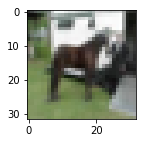

airplane Probability:0.000655608
automobile Probability:0.000426506
bird Probability:0.000086958
cat Probability:0.001054320
deer Probability:0.005311130
dog Probability:0.007145762
frog Probability:0.000098729
horse Probability:0.983715832
ship Probability:0.000048557
truck Probability:0.001456574


In [21]:
show_Predicted_Probability(y_label_test,prediction,
                         x_img_test,Predicted_Probability,20)

In [22]:
print(prediction.shape)
print(y_label_test.shape)
print(y_label_test.reshape(-1))

(10000,)
(10000, 1)
[3 8 8 ... 5 1 7]


In [23]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,790,9,32,5,17,1,3,6,126,11
1,13,915,1,2,1,4,4,0,17,43
2,92,3,615,39,107,38,60,16,24,6
3,54,10,83,490,101,117,79,33,15,18
4,36,2,62,18,779,9,40,43,10,1
5,22,4,65,160,69,583,31,41,14,11
6,13,4,37,26,46,12,850,1,10,1
7,34,4,30,38,59,26,4,787,3,15
8,48,17,7,2,8,3,3,3,901,8
